<h1><center> I. Preparation </center></h1>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from itertools import product

sns.set_theme(rc={'grid.linewidth': 0.6, 'grid.color': 'white',
                  'axes.linewidth': 2, 'axes.facecolor': '#ECECEC', 
                  'axes.labelcolor': '#000000',
                  'figure.facecolor': '#f7f7f7',
                  'xtick.color': '#000000', 'ytick.color': '#000000'})

<p><div style = "text-align: justify; font-size: 14px">The dataset used is the <a href="https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction">heart failure dataset</a>.</div></p>

In [2]:
df = pd.read_csv('./0_Data/heart_failure.csv')

In [3]:
Cat_vars = []
Num_vars = []

for col in list(df.columns):
    if ((df[col].dtype == 'float64') or (df[col].dtype == 'int64')) and (df[col].nunique() > 10):
        Num_vars.append(col)
    else:
        Cat_vars.append(col)

Cat_vars.remove('HeartDisease')

<h1><center> II. Visualising variables </center></h1>

## 1. Exploring variables<a class="anchor" id = "II_1"></a>

### 1.1 Categorical variables

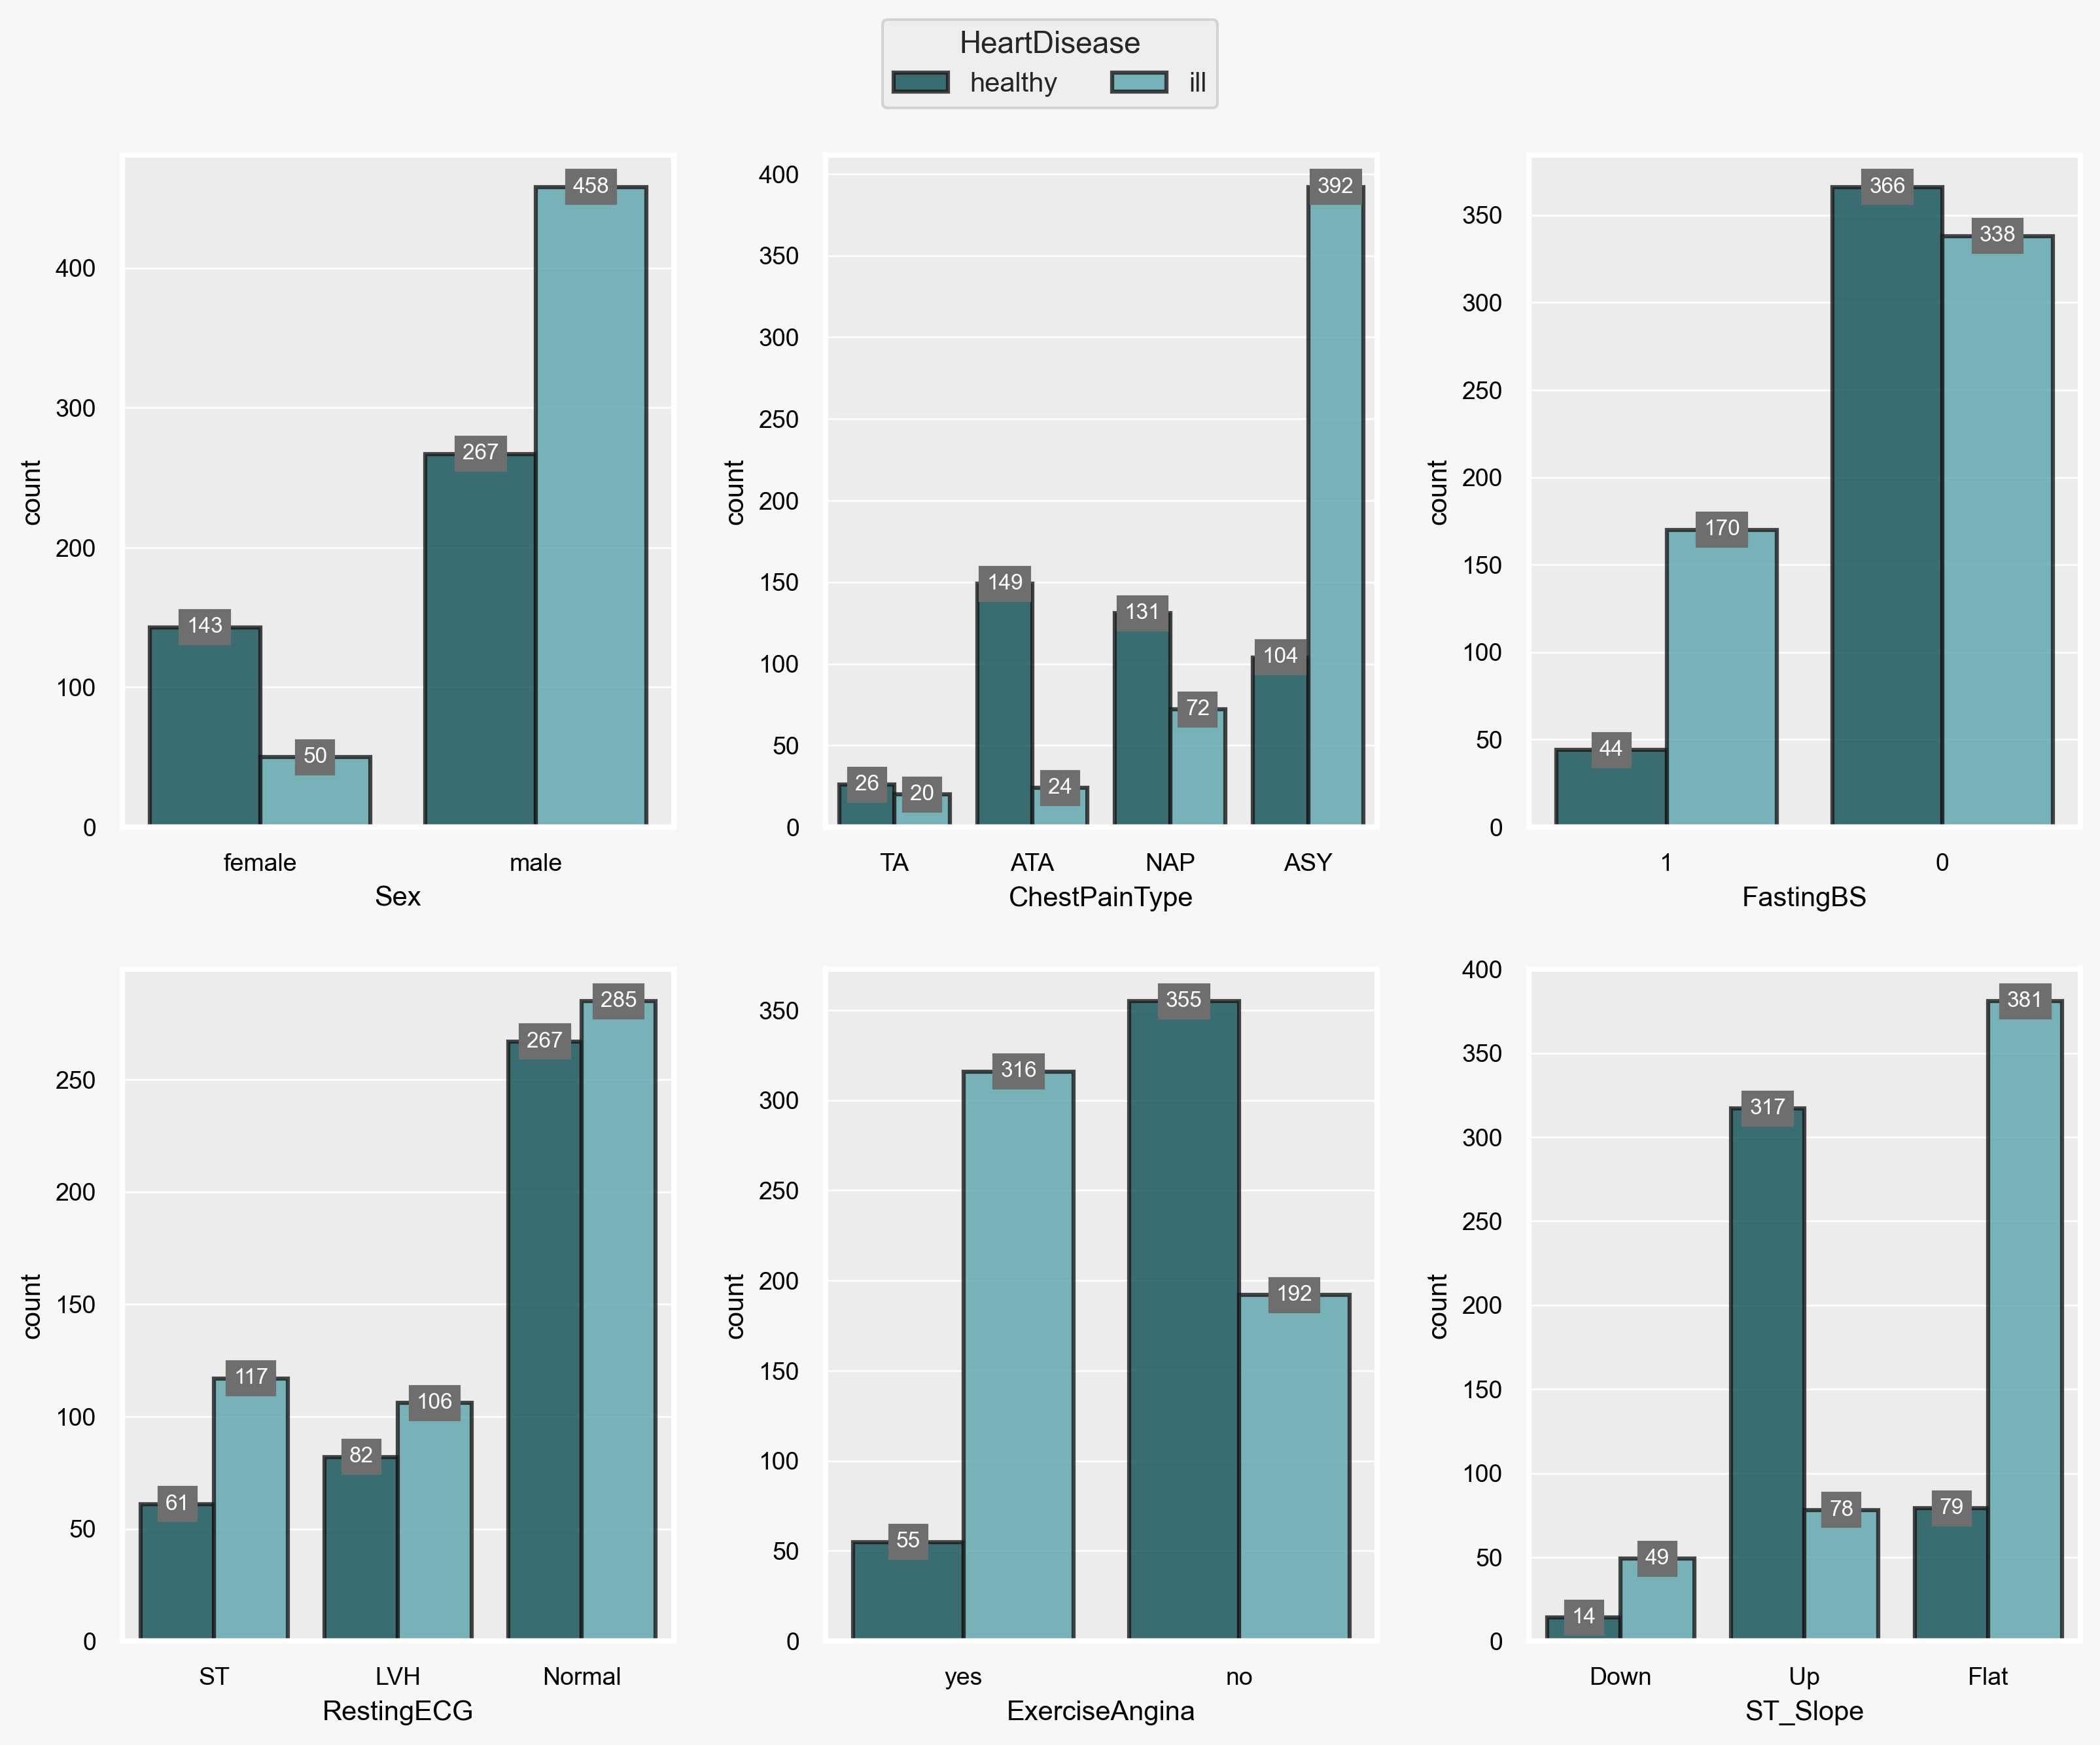

In [4]:
my_palette = ['#00575e', '#4bafb8']

with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 10, 
                        'xtick.labelsize': 9, 'ytick.labelsize': 9}):

    fig, ax = plt.subplots(2, 3, figsize=(11, 8.5))
    
    for idx, (column, axes) in enumerate(zip(Cat_vars, ax.flatten())):
        order = df.groupby(column).size().sort_values(ascending=True).index.tolist()
    
        cplot = sns.countplot(ax=axes, x=df[column], hue=df['HeartDisease'],
                              order=order, linewidth=1.5,
                              edgecolor='k', palette=my_palette, alpha=0.8)
        
        axes.get_legend().remove()
        
        for x in cplot.patches:
            cplot.annotate(format(x.get_height(), '.0f'), 
                           (x.get_x() + x.get_width() / 2, x.get_height()), 
                           ha='center', va='center', size=8, color='w',
                           bbox=dict(boxstyle='square, pad=0.3', 
                           fc='#6e6e6e', lw=1, ec='#6e6e6e'))
    
    else:
        [axes.set_visible(False) for axes in ax.flatten()[idx + 1:]]
    
    # Global legend
    
    handles, labels = axes.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', 
                 bbox_to_anchor=(0.5, 1.06), ncol=2, fontsize=10,
                 title='HeartDisease', title_fontsize=11)        

    plt.tight_layout(pad=1.5)
    plt.show()

<div style = "text-align: justify; font-size: 14px">From the above graphs the following was concluded:</div>

- <div style = "text-align: justify; font-size: 14px"><span style="color:#0049d1">"Sex"</span>: male patients had a significantly higher rate of illness than women had;</div>
- <div style = "text-align: justify; font-size: 14px"><span style="color:#0049d1">"Chest Pain Type"</span>: patients with atypical angina (ATA) or non-anginal pain (NAP) had considerably lower chances of having a HeartDisease than those who were asymptomatic;</div>
- <div style = "text-align: justify; font-size: 14px"><span style="color:#0049d1">"Fasting BS"</span>: about 80% of people with a fasting blood sugar above 120 mg/dl had a HeartDisease;</div>
- <div style = "text-align: justify; font-size: 14px"><span style="color:#0049d1">"Resting ECG"</span>: having ST-T wave abnormality (ST) or showing probable or definite left ventricular hypertrophy (LVH) was associated with a higher probability of being sick.</div>
- <div style = "text-align: justify; font-size: 14px"><span style="color:#0049d1">"Exercise Angina"</span>: more than 85% of patients who suffered from exercise-induced angina had a HeartDisease;</div>
- <div style = "text-align: justify; font-size: 14px"><span style="color:#0049d1">"ST Slope"</span>: categories Up and Flat had an inverse relationship with the target.</div>

### 1.2 Numeric variables

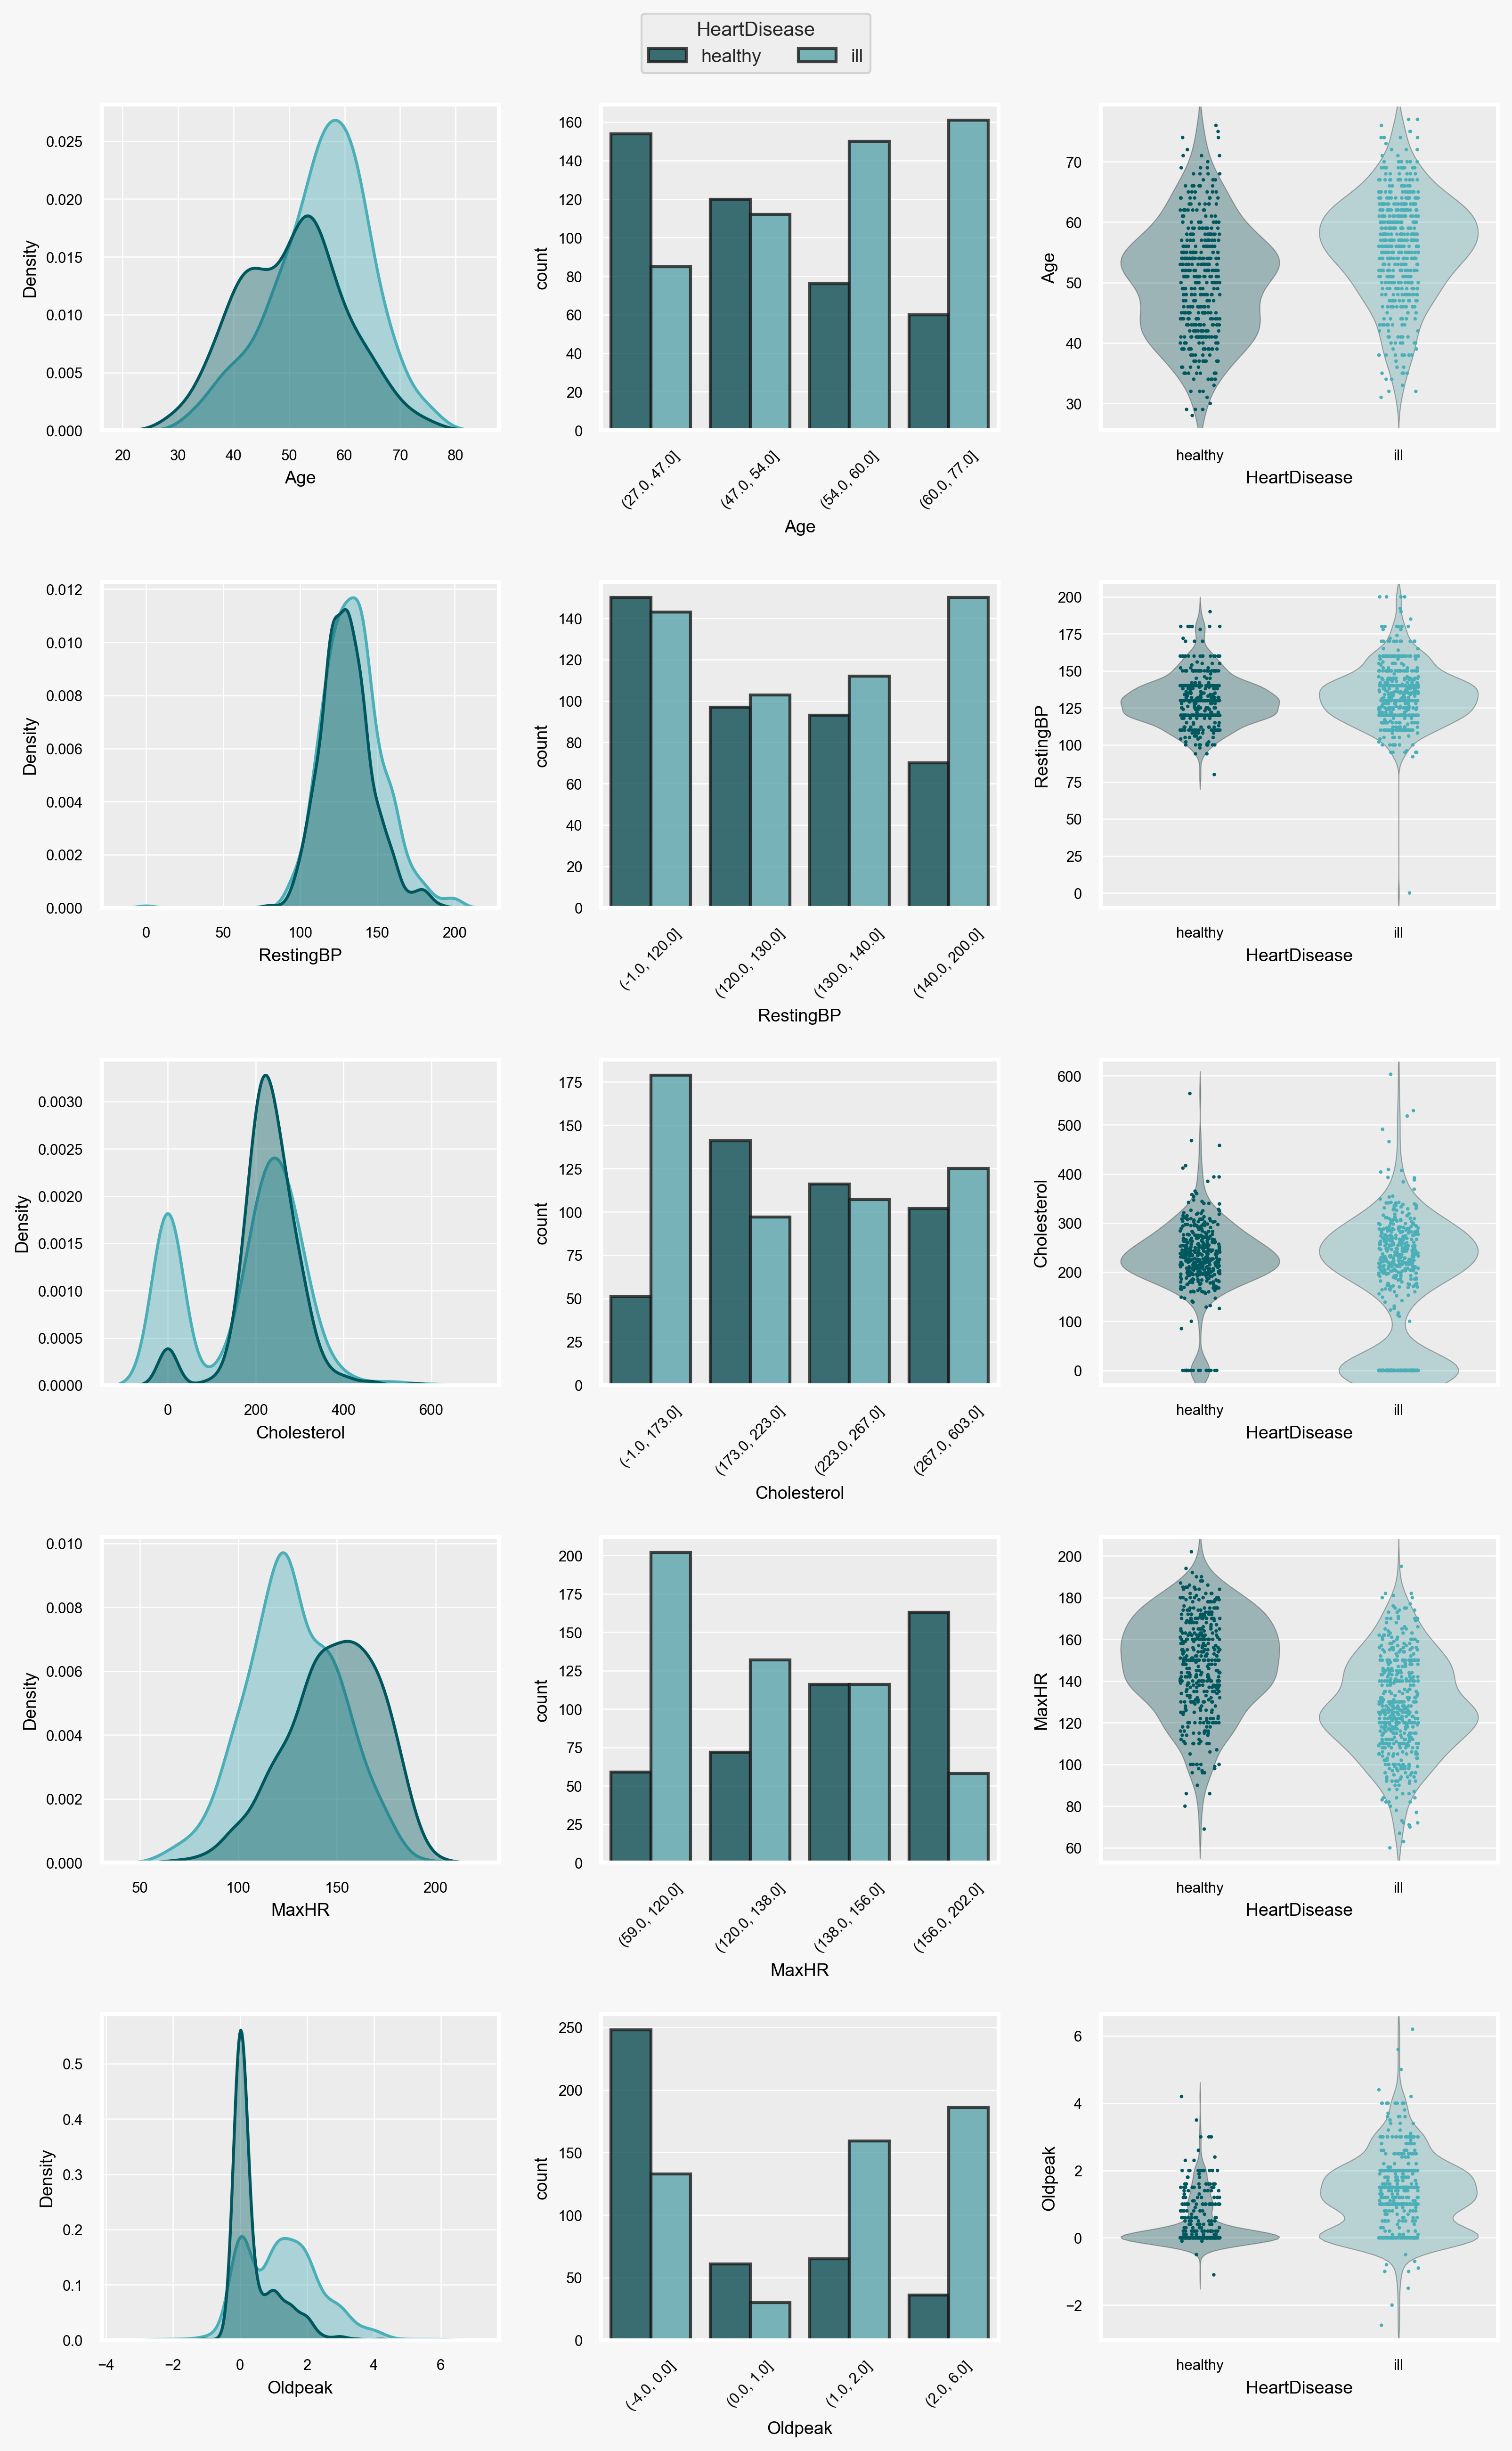

In [5]:
with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 9, 
                        'xtick.labelsize': 7.5, 'ytick.labelsize': 7.5}):

    fig, ax = plt.subplots(5, 3, figsize=(11, 17))
    col_no = 0

    for column in Num_vars:
        
        # KDE plots
    
        sns.kdeplot(ax=ax[col_no, 0], x=df[column], hue=df['HeartDisease'],
                    common_norm=True, fill=True, alpha=0.4, palette=my_palette, linewidth=1.5)
        
        ax[col_no, 0].get_legend().remove()
        
        # Quantile-based discretization
        
        cuts=pd.qcut(df[column], 4, precision=0)
        
        sns.countplot(ax=ax[col_no, 1], x=cuts, hue=df['HeartDisease'], 
                      linewidth=1.5, edgecolor='k', palette=my_palette, alpha=0.8)
        
        ax[col_no, 1].get_legend().remove()
        plt.setp(ax[col_no, 1].get_xticklabels(), rotation=45)
        
        # Violinplots & stripplots
        
        sns.violinplot(ax=ax[col_no, 2], x=df['HeartDisease'], y=df[column],
                       palette=my_palette, scale='width', linewidth=0.5, inner=None)
        
        plt.setp(ax[col_no, 2].collections, alpha=0.35)
        
        sns.stripplot(ax=ax[col_no, 2], x=df['HeartDisease'], y=df[column], hue=df['HeartDisease'],
                      palette=my_palette, alpha=1, s=1.8, jitter=0.1)

        ax[col_no, 2].get_legend().remove()
        col_no += 1
    
    # A global legend
    
    handles, labels = ax[4, 1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', 
               bbox_to_anchor=(0.5, 1.027), ncol=2, 
               fontsize=9.5, title='HeartDisease', title_fontsize=10)
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px">A kdeplot and a combination of a stripplot with a violinplot should provide us with a good understanding of numeric predictors. However, it might be useful to bin variables as well via quantile-based discretization. It can help  discover more general tendencies. Analysing the above graphs, one can conclude that higher values of <span style="color:#0049d1">"Age"</span>, <span style="color:#0049d1">"Max HR"</span> and <span style="color:#0049d1">"Oldpeak"</span> (ST depression induced by exercise relative to rest) were associated with the presence of a heart disease.</div></p>

## 2. Exploring interactions between variables <a class="anchor" id = "II_2"></a>

### 2.1 Categorical and numeric variables

<p><div style = "text-align: justify; font-size: 14px">If you have observed that a particular categorical predictor has a strong connection with the target variable, you can learn more about it by exploring interactions between this categorical variable and different numeric features.</div></p>

In [6]:
Combinations = []

for num, cat in product(['Age', 'MaxHR', 'Oldpeak'], ['Sex', 'ST_Slope']):
    Combinations.append([num] + [cat])

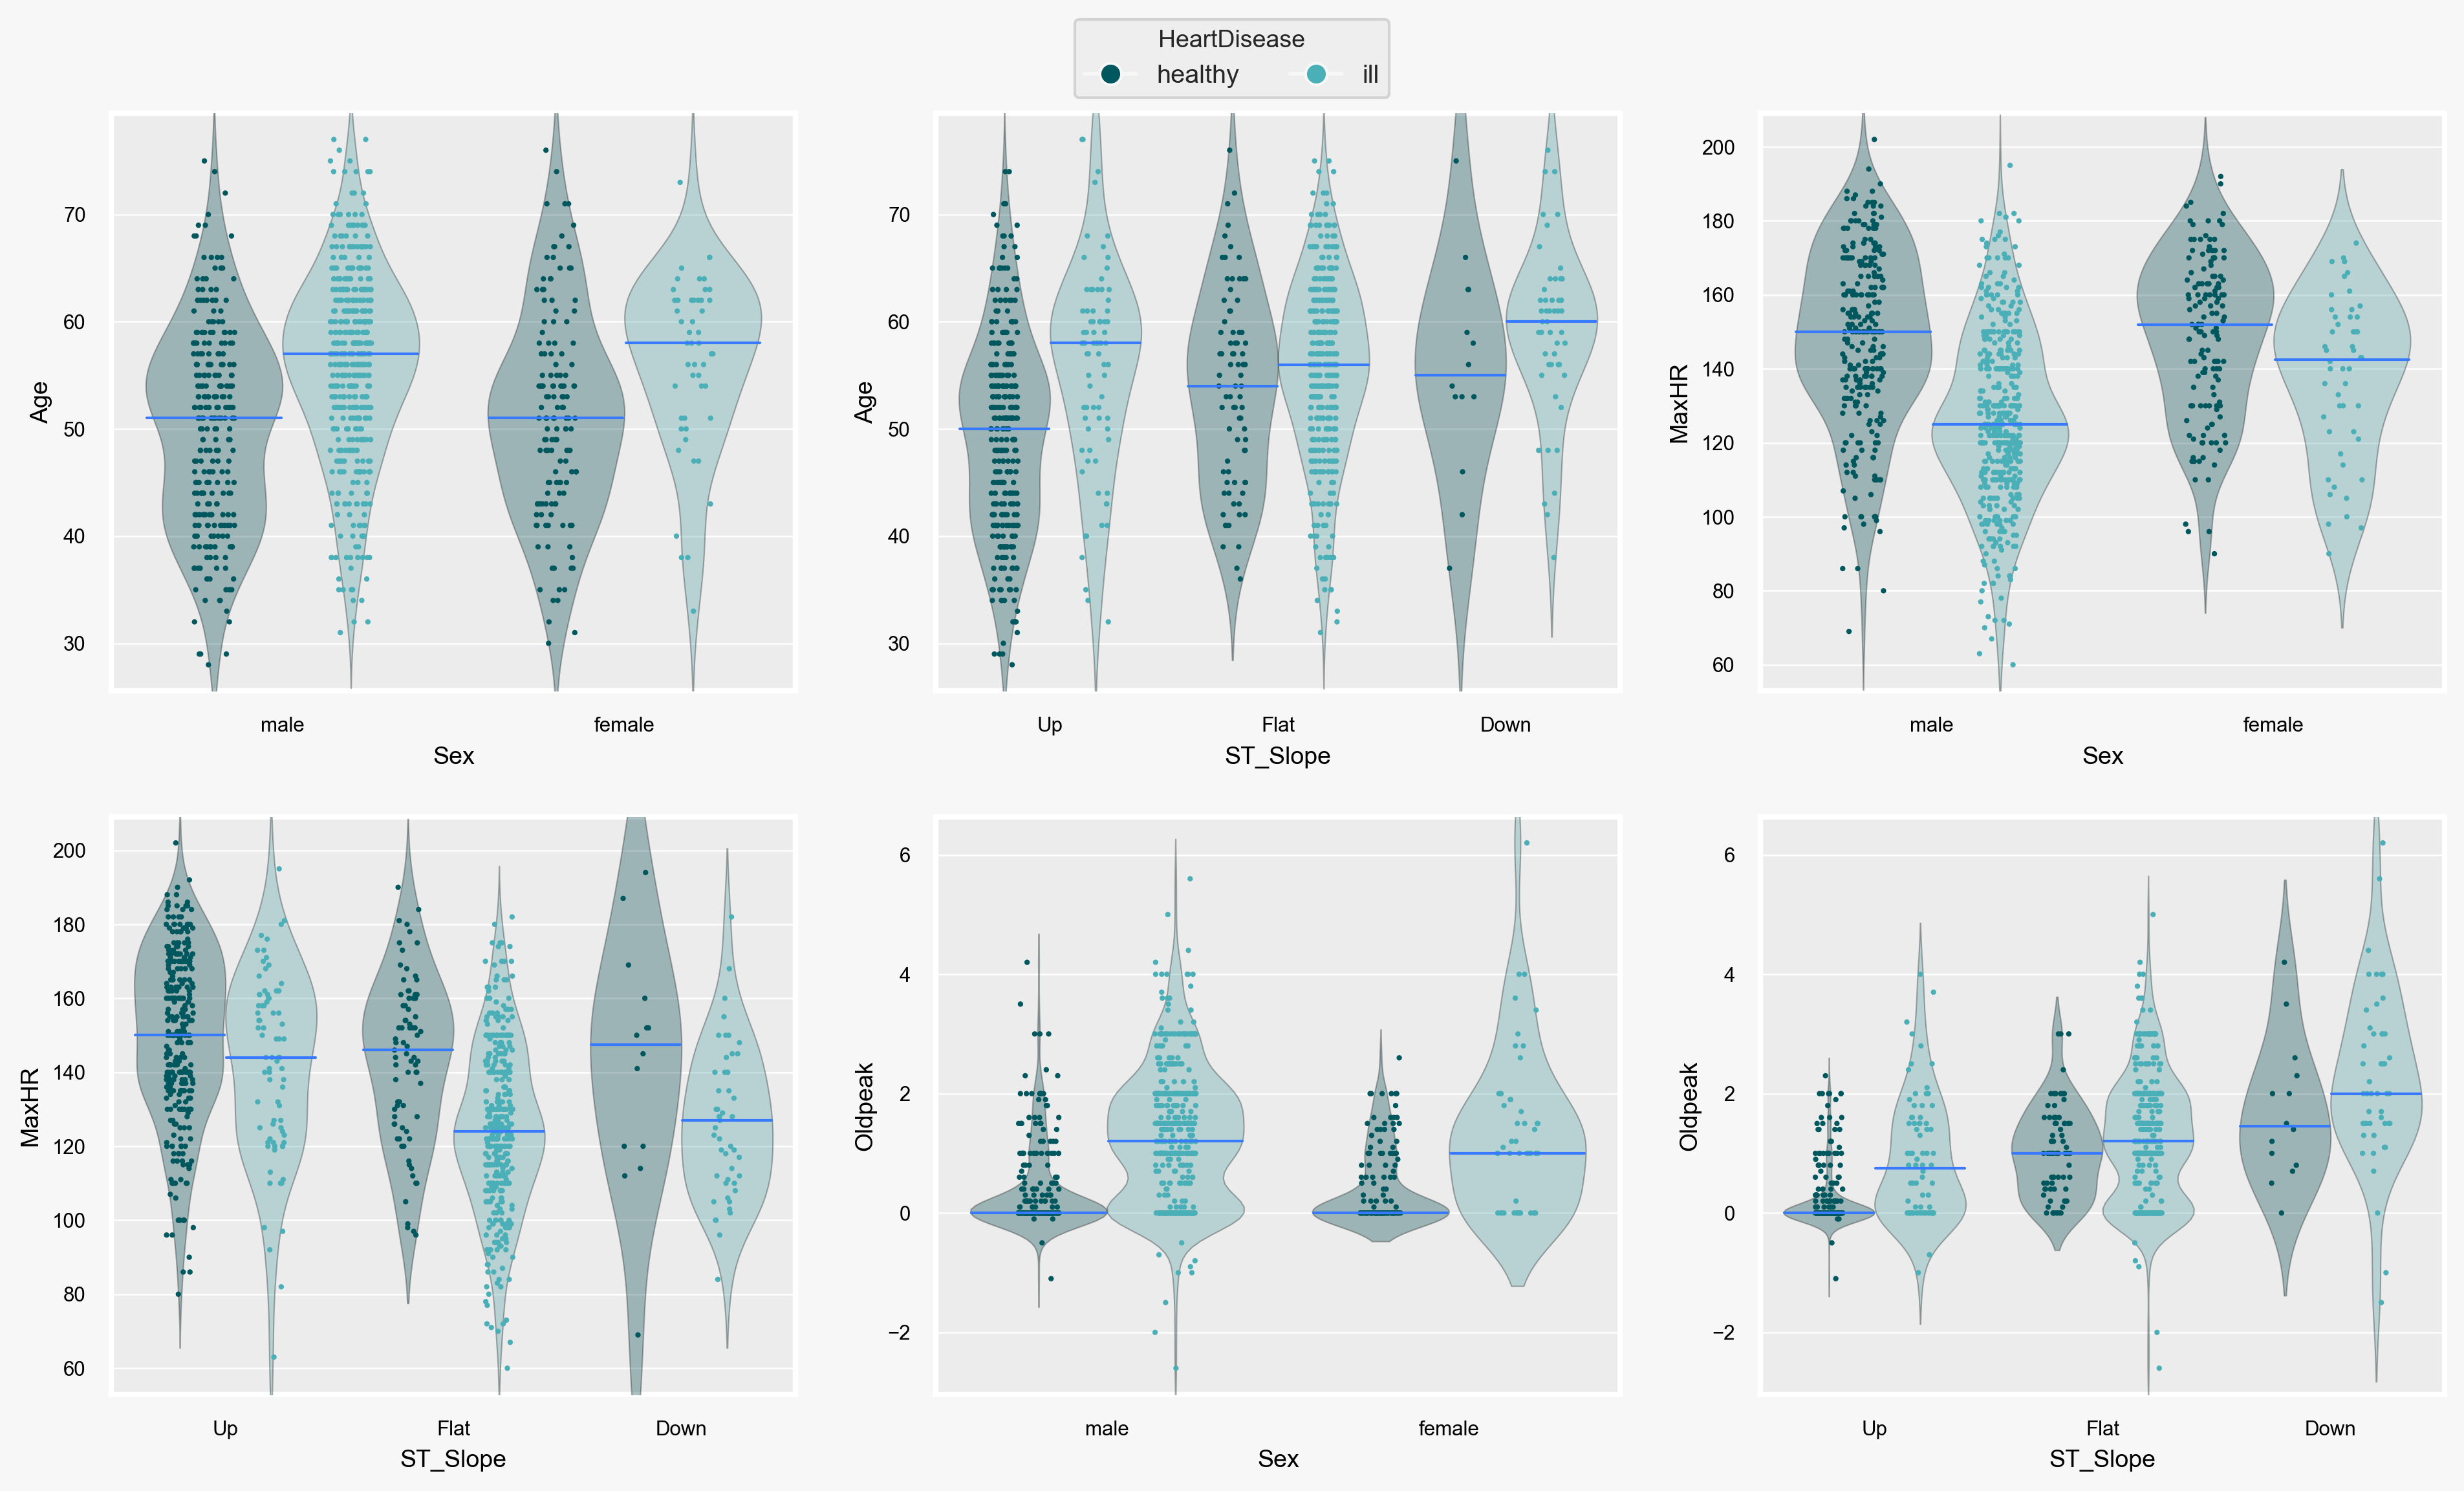

In [7]:
with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 9, 
                        'xtick.labelsize': 7.5, 'ytick.labelsize': 7.5}):

    fig, ax = plt.subplots(2, 3, figsize=(13, 7.5))

    for idx, ((y, x), axes) in enumerate(zip(Combinations, ax.flatten())):
        
        sns.violinplot(ax=axes, x=df[x], 
                       y=df[y], hue=df['HeartDisease'],
                       scale='width', inner=None,
                       linewidth=0.5, palette=my_palette)
        
        plt.setp(axes.collections, alpha=0.35)
    
        sns.stripplot(ax=axes, x=df[x], dodge=True,
                      y=df[y], hue=df['HeartDisease'],
                      palette=my_palette, s=2, alpha=1,
                      jitter=0.12)
        
        sns.boxplot(ax=axes, y=df[y], 
                    x=df[x], hue=df['HeartDisease'],
                    showmeans=False, meanline=False, zorder=10,
                    meanprops={'visible': True},
                    medianprops={'color': '#387aff', 'linestyle': '-', 'lw': 1},
                    whiskerprops={'visible': False},
                    showfliers=False, showbox=False, showcaps=False)
        
        axes.get_legend().remove()
        plt.setp(axes.lines, zorder=100)
        plt.setp(axes.collections, zorder=100)
    
    # A global legend
    
    healthy = Line2D([0], [0], marker='o', color='#f7f7f7', label='healthy',
                     markerfacecolor='#00575e', markersize=8)
    
    ill = Line2D([0], [0], marker='o', color='#f7f7f7', label='ill',
                 markerfacecolor='#4bafb8', markersize=8)
    
    fig.legend(handles=[healthy, ill],
               loc='upper center', bbox_to_anchor=(0.5, 1.04), ncol=2, 
               fontsize=9.5, title='HeartDisease', title_fontsize=9)  
    
    plt.tight_layout(pad=1.5)
    plt.show()

### 2.2 Numeric variables

In [8]:
Num_vars_target = Num_vars.copy()
Num_vars_target.append('HeartDisease')

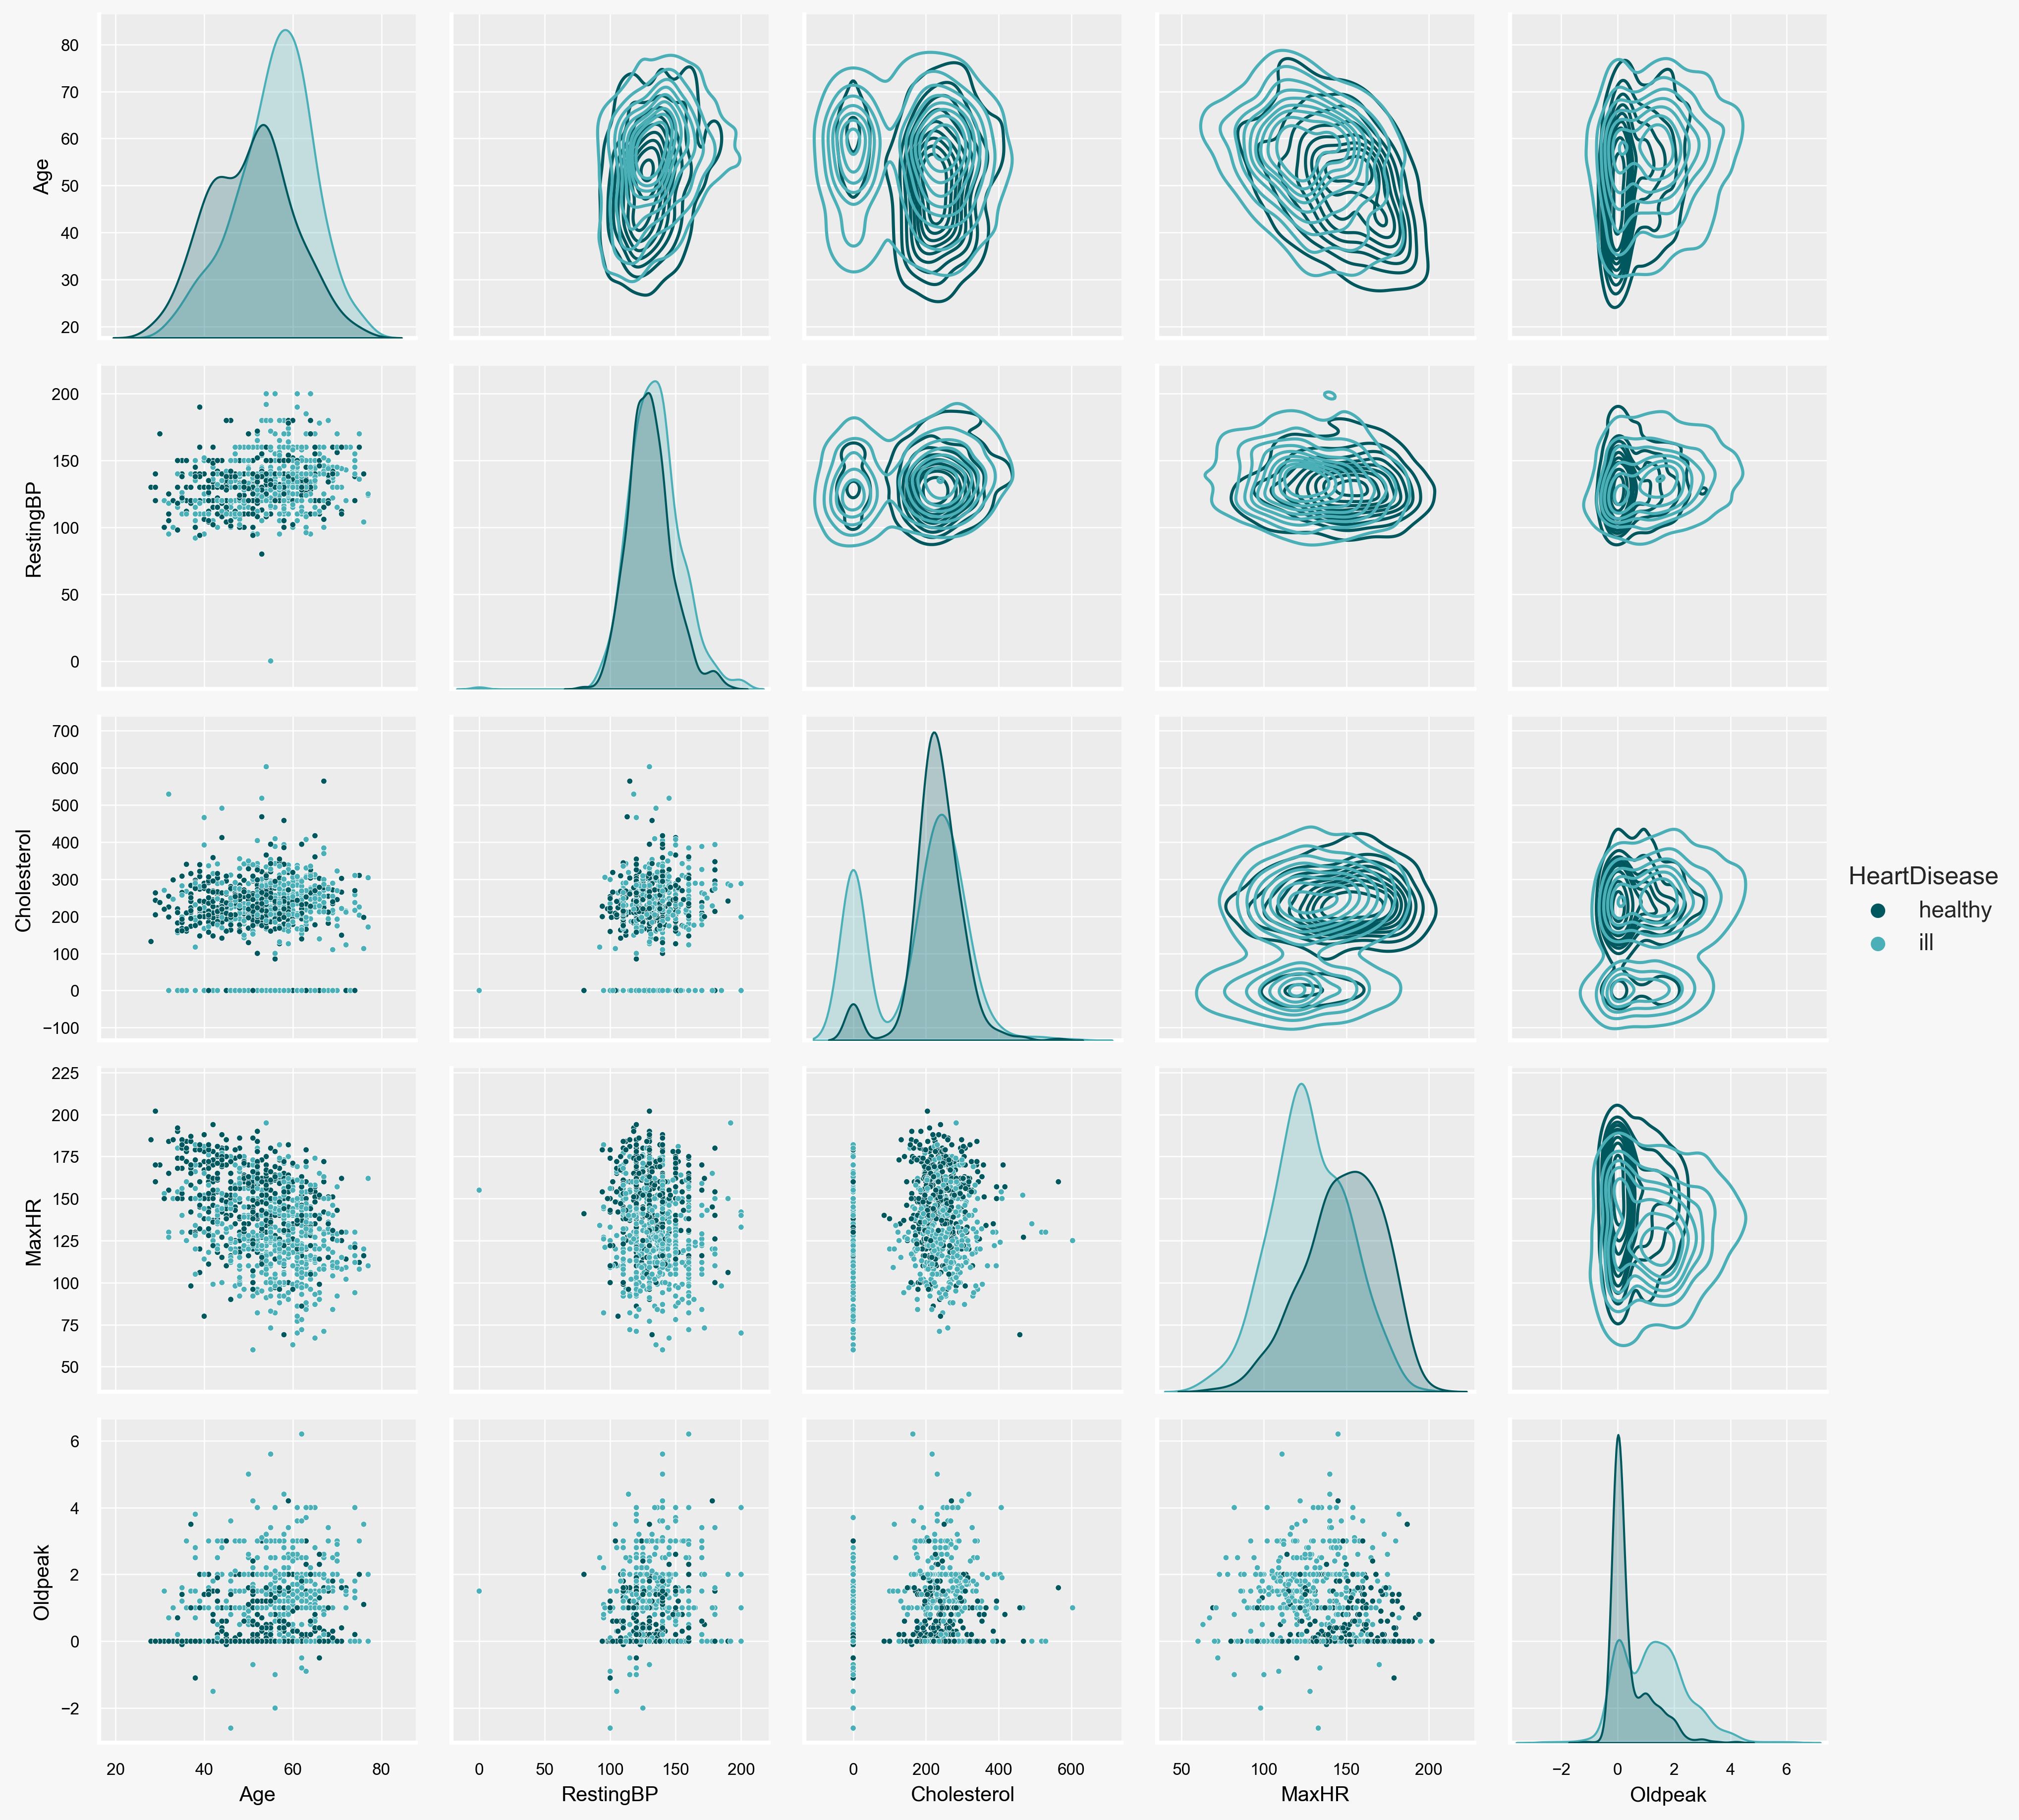

In [9]:
with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 10, 
                        'xtick.labelsize': 8, 'ytick.labelsize': 8}):
    
    fig = sns.PairGrid(df[Num_vars_target], diag_sharey=False,
                       hue='HeartDisease', palette=my_palette)
    
    fig.map_lower(sns.scatterplot, s=8)
    
    fig.add_legend()
    
    fig.map_upper(sns.kdeplot)
    fig.map_diag(sns.kdeplot, fill=True)
    
    plt.show()

<p><div style = "text-align: justify; font-size: 14px">It can be easily seen that numeric features, by and large, were not highly correlated with each other. The only exceptions were two pairs of predictors: <span style="color:#0049d1"> "Age" </span> vs <span style="color:#0049d1"> "Max HR" </span> and <span style="color:#0049d1"> "Age" </span> vs <span style="color:#0049d1"> "Resting BP" </span>.</div></p>

<h1><center> III. PCA and Clustering </center></h1>

## 1. PCA <a class="anchor" id = "III_1"></a>

<p><div style = "text-align: justify; font-size: 14px">Interpreting n-dimensional data is a tough task. Being able to reduce the number of dimensions while preserving as much information as possible can be truly beneficial. That is when PCA comes into play. Instead of working with multiple original numeric variables, we use their linear combinations, paying attention to those that account for as much variation in the original data as possible. Of course, one should remember that choosing linear combinations of predictors based on the maximum amount of variance explained in your data is not necessarily helpful when it comes to predicting the target variable itself.</div></p>

In [10]:
def scaling_pca(df, Vars_list, n_components=10):
    
    # Scaling data
    
    scaler = StandardScaler()
    data_scaled = pd.DataFrame(scaler.fit_transform(df[Vars_list]), 
                               columns=df[Vars_list].columns)
    
    # Initialising PCA
    
    pca = PCA(n_components=n_components)
    pca_fit = pca.fit(data_scaled)
    pca_transf = pca.transform(data_scaled)
    
    return pca_fit, pca_transf

In [11]:
PCA_results = scaling_pca(df, Num_vars, n_components=len(Num_vars))

<p><div style = "text-align: justify; font-size: 14px">Firstly, eigenvalues should be analysed. It reveals how much variance is explained by each principal component, which is done to determine what principal components are vital for further analysis.</div></p>

In [12]:
PCA_variance = pd.DataFrame({'Explained variance, %': 
                             PCA_results[0].explained_variance_ratio_*100})

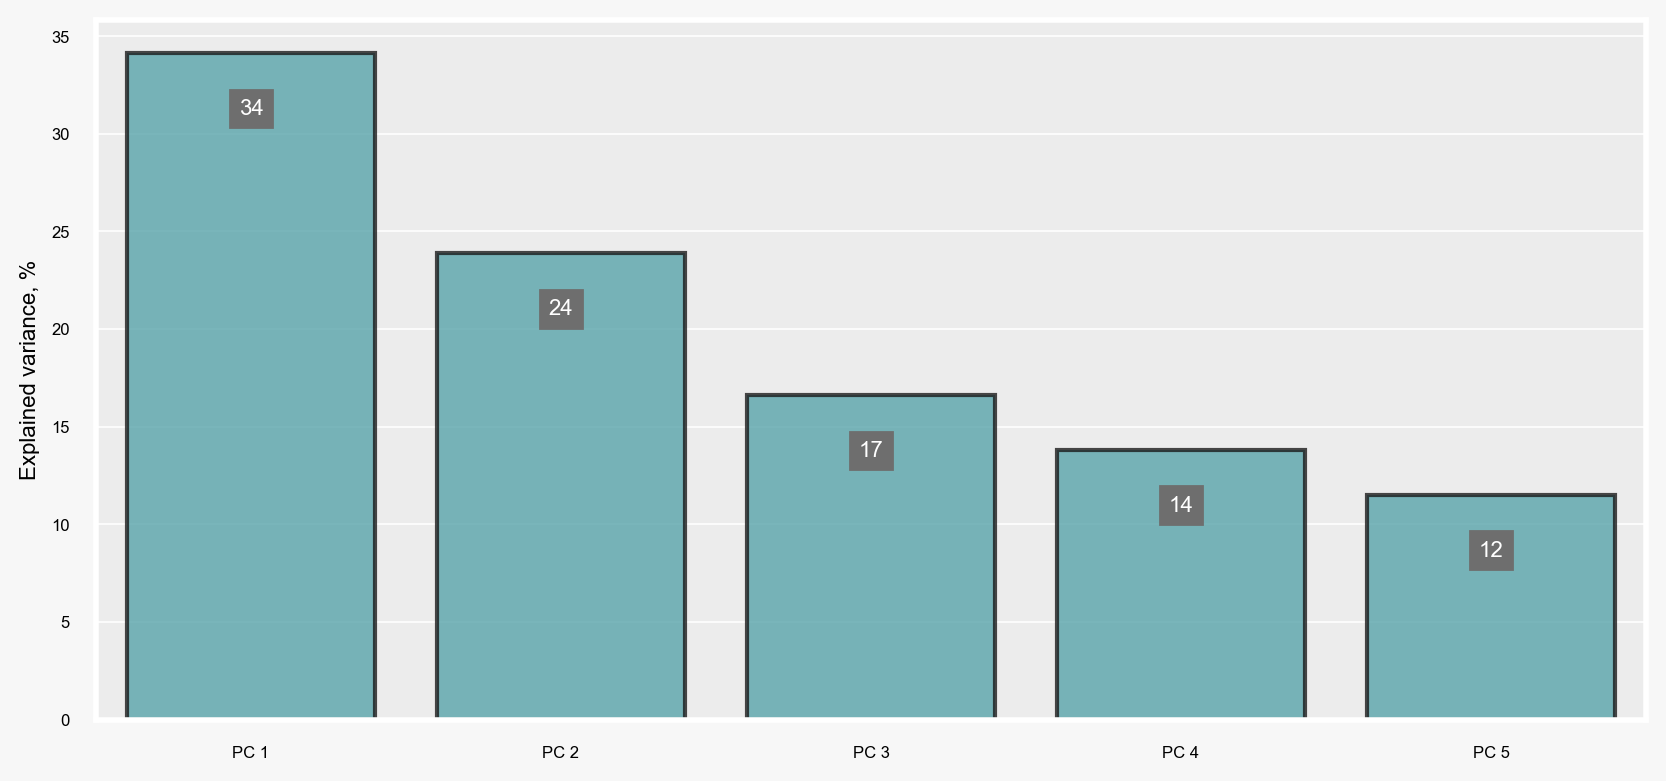

In [13]:
with plt.rc_context(rc={'figure.dpi': 200, 'axes.labelsize': 8, 
                        'xtick.labelsize': 6, 'ytick.labelsize': 6}):
    
    fig, ax = plt.subplots(2, 1, figsize=(10, 10))

    bar = sns.barplot(ax=ax[0], x=[f'PC {x}' for x in range(1, 6)], 
                      y=PCA_variance['Explained variance, %'],
                      linewidth=1.5, edgecolor='k', color='#4bafb8', 
                      alpha=0.8)
    
    # Annotation
    
    for x in bar.patches:
        bar.annotate(format(x.get_height(), '.0f'), 
                     (x.get_x() + x.get_width() / 2, x.get_height()), 
                      ha='center', va='center', size=8, color='w',
                      xytext=(0, -20), textcoords='offset points',
                      bbox=dict(boxstyle='square, pad=0.4', 
                                  fc='#6e6e6e', lw=1, ec='#6e6e6e'))

    ax[1].set_visible(False)
    
    plt.show()

<p><div style = "text-align: justify; font-size: 14px">As it frequently the case, the 1st PC alone was not sufficient in explaining a large proportion of variance. Needless to say, the more PCs we incorporate in our analysis, the more challenging it becomes to make sense of data. Thus, only 3 principal components were included. Following that, the elements of eigenvectors (loadings) were examined. Since loadings represent the direction of maximum variance in data, by analysing these values, we can determine how each variable contributes to a particular principal component. The larger the values, the stronger the correlation with the respective PCs. Remember, for results to be interpretable this way, we have to standardise data first.</div></p>

In [14]:
pd.DataFrame(PCA_results[0].components_, columns = df[Num_vars].columns,
             index = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5']).round(2).T

PC 1  PC 2  PC 3  PC 4  PC 5
Age         -0.60 -0.01 -0.08  0.32  0.73
RestingBP   -0.37 -0.47 -0.64 -0.43 -0.19
Cholesterol  0.18 -0.74  0.06  0.63 -0.13
MaxHR        0.54 -0.34  0.04 -0.43  0.63
Oldpeak     -0.42 -0.32  0.76 -0.36 -0.11

<p><div style = "text-align: justify; font-size: 14px">Finally, using the elements of eigenvectors, scores were calculated:</div></p>

$${\mathrm {PC 1}} = -0.60*{\mathrm {Age}} - 0.37*{\mathrm {RestingBP}} + 0.18*{\mathrm {Cholesterol}} + 0.54*{\mathrm {MaxHR}} - 0.42*{\mathrm {Oldpeak}}$$
$${\mathrm {PC 2}} = -0.01*{\mathrm {Age}} - 0.47*{\mathrm {RestingBP}} - 0.74*{\mathrm {Cholesterol}} - 0.34*{\mathrm {MaxHR}} - 0.32*{\mathrm {Oldpeak}}$$
$${\mathrm {PC 3}} = -0.08*{\mathrm {Age}} - 0.64*{\mathrm {RestingBP}} + 0.06*{\mathrm {Cholesterol}} + 0.04*{\mathrm {MaxHR}} + 0.76*{\mathrm {Oldpeak}}$$

<p><div style = "text-align: justify; font-size: 14px">After analysing the first 3 PCs, the following conclusions were drawn:</div></p>

- <div style = "text-align: justify; font-size: 14px">PC 1 was strongly correlated with <span style="color:#0049d1">"Age"</span> and <span style="color:#0049d1">"Max HR"</span>;</div>
- <div style = "text-align: justify; font-size: 14px">PC 2 decreased with increasing <span style="color:#0049d1"> "Cholesterol" </span>, which was the primary factor defining PC 2;</div>
- <div style = "text-align: justify; font-size: 14px">PC 3 showed a strong inverse relationship with <span style="color:#0049d1">"Resting BP"</span> and a noticeable direct relationship with <span style="color:#0049d1">"Oldpeak"</span>.</div>

In [15]:
PCA_scores = pd.DataFrame(PCA_results[1], columns=['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

For more in-depth analysis two biplots were produced:

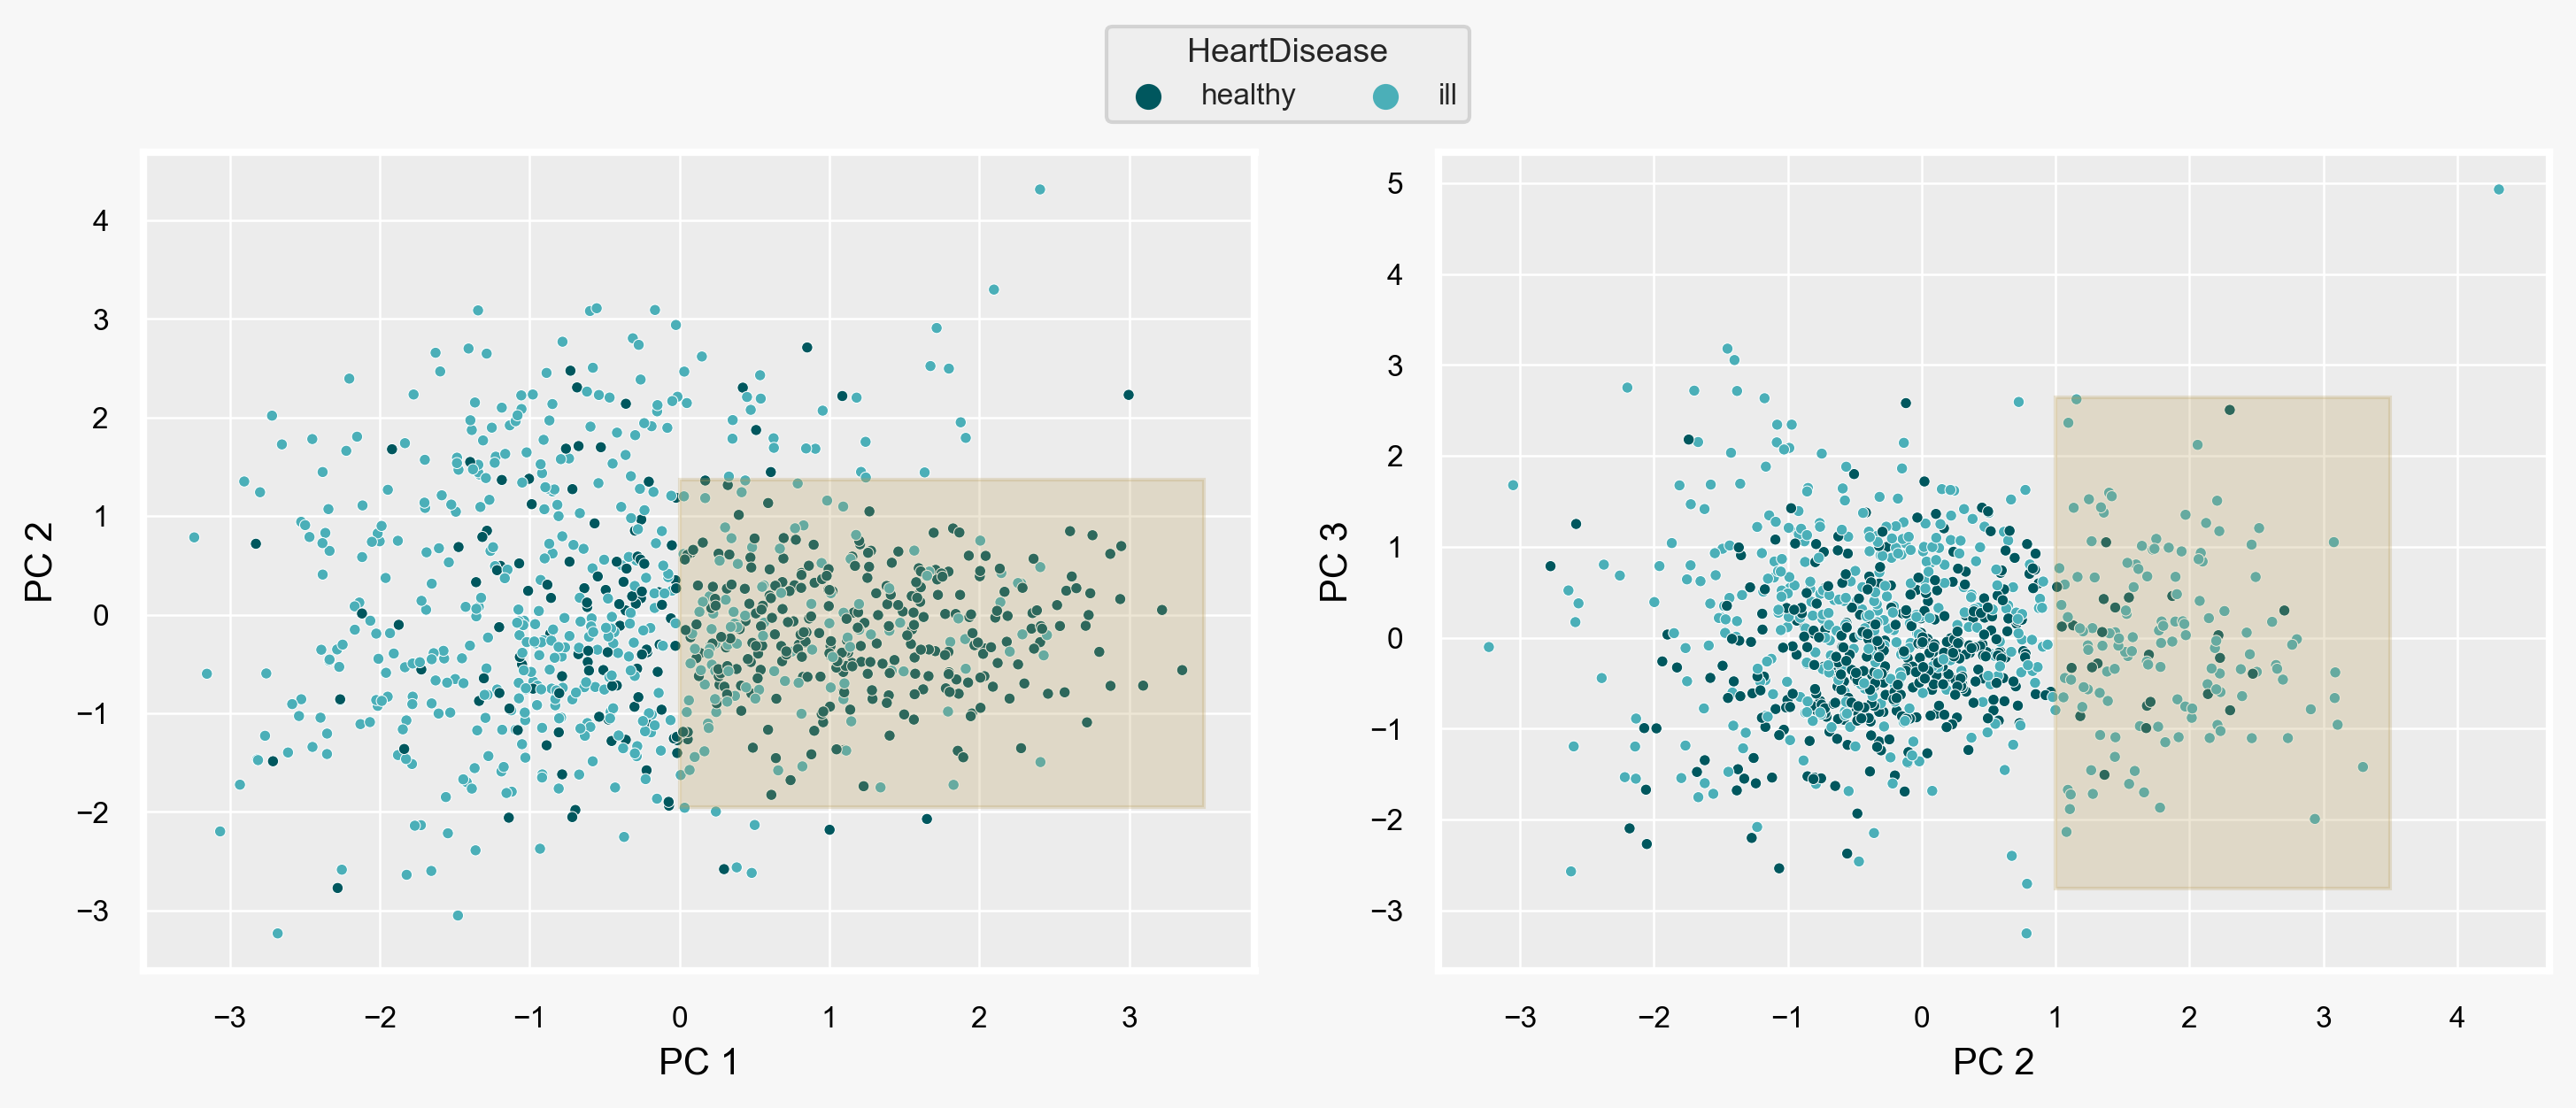

In [16]:
with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 10, 
                        'xtick.labelsize': 8, 'ytick.labelsize': 8, 
                        'legend.fontsize': 7, 'legend.title_fontsize': 8}):
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    
    # PC 1 & PC 2
    
    sns.scatterplot(ax=ax[0], x=PCA_scores['PC 1'], y=PCA_scores['PC 2'], 
                    hue=df['HeartDisease'], palette=my_palette , s=9)
    
    ax[0].get_legend().remove()
    ax[0].axvspan(xmin=0, xmax=3.5, ymin=0.2, ymax=0.6, alpha=0.25, color='#ba9e59')
    
    # PC 2 & PC 3
    
    sns.scatterplot(ax=ax[1], x=PCA_scores['PC 2'], y=PCA_scores['PC 3'], 
                    hue=df['HeartDisease'], palette=my_palette, s=9)
    
    ax[1].get_legend().remove()
    ax[1].axvspan(xmin=1, xmax=3.5, ymin=0.1, ymax=0.7, alpha=0.25, color='#ba9e59')
    
    # Global legend
    
    handles, labels=ax[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', 
               bbox_to_anchor=(0.5, 1.07), ncol=2, 
               fontsize=8, title='HeartDisease', title_fontsize=9)
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px">Exploring the 1st biplot, we can see that patients with larger values of PC 1 – younger patients with higher heart rates – were more likely to be healthy. The 2nd biplot exposed a cluster of ill patinets with low (0) cholesterol (large PC 2 values).</div></p>

## 2. Clustering <a class="anchor" id = "III_2"></a>

If you have lots of numeric variables, it might be useful to cluster them so that general trends become more evident.

### 2.1 A gaussian mixture model

The number of clusters was tuned using BIC:

In [17]:
def Gaussian_mix_claster_tuning(df, Vars_list, max_cluster=10):

    # Setting initial parameters

    bic = []
    lowest_bic = np.infty
    n_components_range = range(1, max_cluster)
    
    # Looping over n_components
    
    for n_components in n_components_range:
        gmm = GaussianMixture(n_components=n_components, covariance_type='full')
        gmm.fit(df[Vars_list])
        bic.append(gmm.bic(df[Vars_list]))
        
    return bic

In [18]:
Cluster_tuning_Gaussian_mix = pd.DataFrame({'Cluster': range(1, 10),
                                            'BIC': Gaussian_mix_claster_tuning(df, Num_vars, max_cluster=10)})

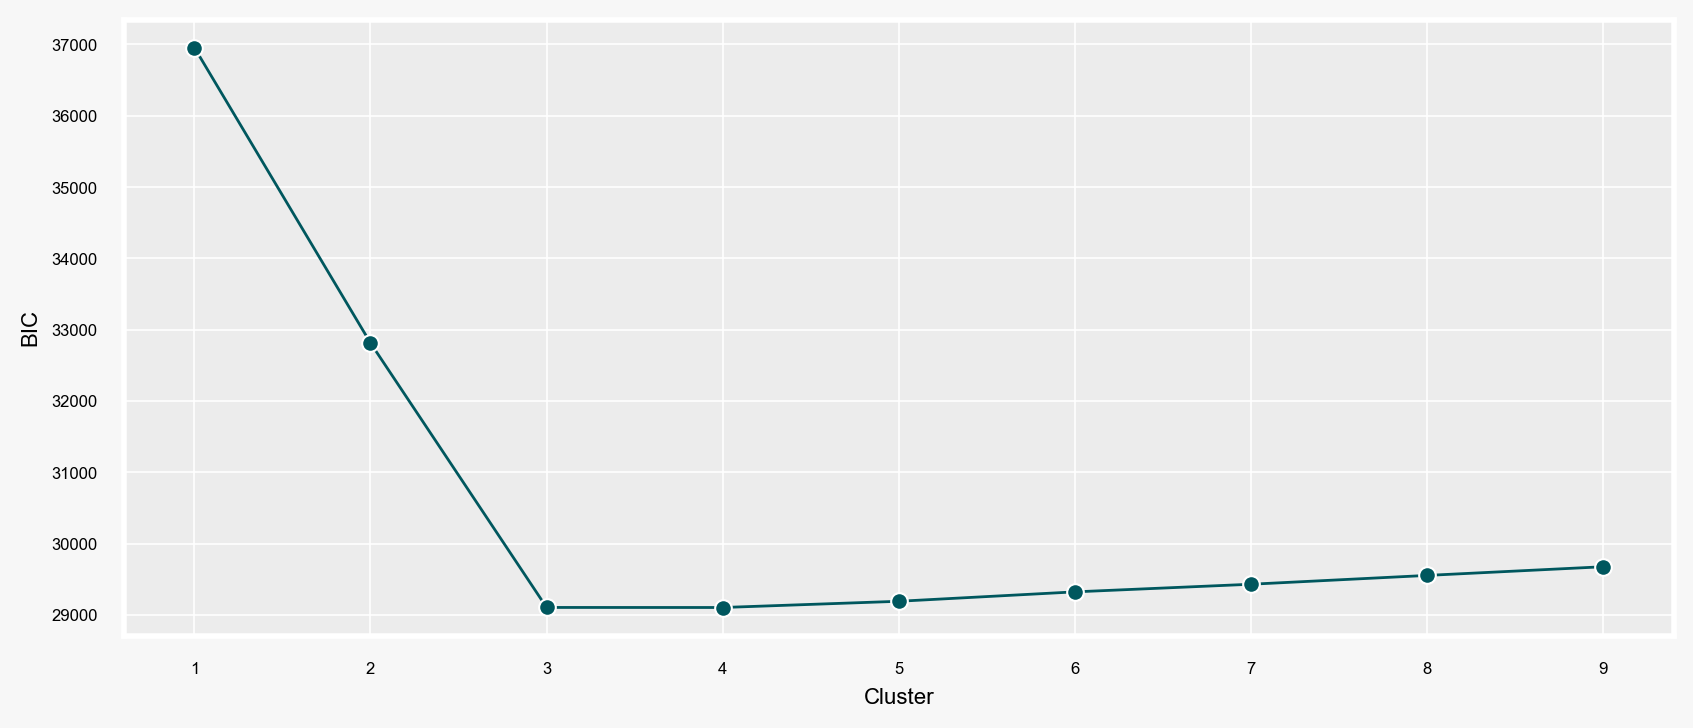

In [19]:
with plt.rc_context(rc={'figure.dpi': 200, 'axes.labelsize': 8, 
                        'xtick.labelsize': 6, 'ytick.labelsize': 6}):
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

    sns.lineplot(x=Cluster_tuning_Gaussian_mix['Cluster'], 
                 y=Cluster_tuning_Gaussian_mix['BIC'], 
                 color='#00575e', marker='o', linewidth=1)
          
    plt.show()

In [20]:
Gaussian_model = GaussianMixture(n_components=3, covariance_type='full')
df['Gaussian_mixture'] = Gaussian_model.fit_predict(df[Num_vars])

### 2.2 K-means clastering

The number of clusters was tuned using sum of squared distances of samples to their closest cluster center (SSE):

In [21]:
def K_means_claster_tuning(df, Vars_list, max_cluster=10):
    
    # Scaling data
    
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(df[Vars_list])
    
    # Calculating inertia_ for each number of clusters
    
    SSE = []
    
    for cluster in range(1, max_cluster):
        kmeans = KMeans(n_clusters=cluster, init='k-means++', n_init='auto', random_state=999)
        kmeans.fit(data_scaled)
        SSE.append(kmeans.inertia_)
        
    df_plot = pd.DataFrame({'Cluster': range(1, max_cluster), 'SSE': SSE})
    
    return df_plot

In [22]:
Cluster_tuning_k_means = K_means_claster_tuning(df, Num_vars, max_cluster=10)

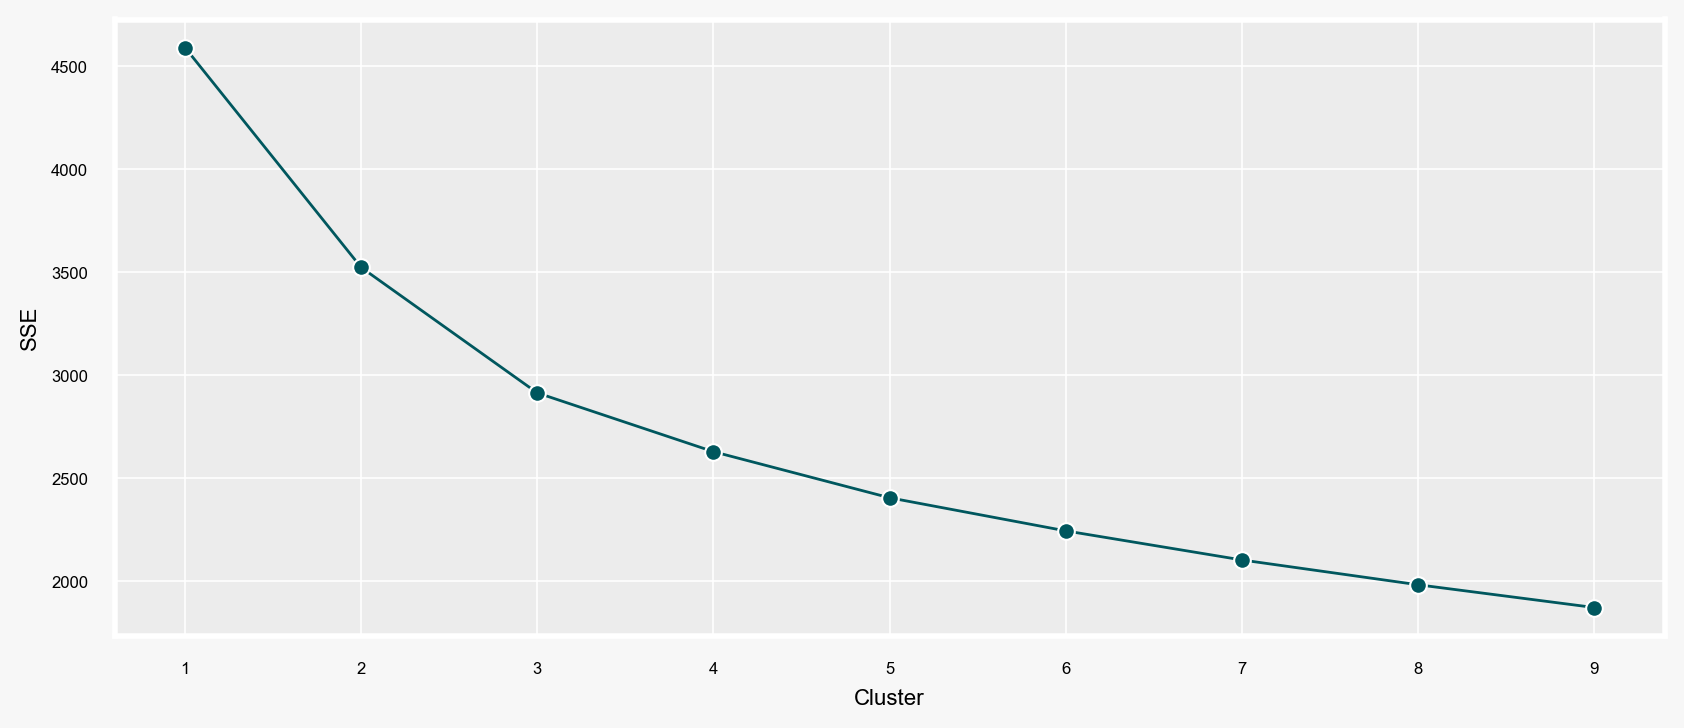

In [23]:
with plt.rc_context(rc={'figure.dpi': 200, 'axes.labelsize': 8, 
                        'xtick.labelsize': 6, 'ytick.labelsize': 6}):
    
    fig, ax = plt.subplots(1, 1, figsize=(10, 4))

    sns.lineplot(x=Cluster_tuning_k_means['Cluster'].astype('int64'), 
                 y=Cluster_tuning_k_means['SSE'], color='#00575e', 
                 marker='o', linewidth=1)
    
    plt.xticks(range(1, 10))
          
    plt.show()

<p><div style = "text-align: justify; font-size: 14px"> According to the graph, the optimal number of clusters was 3 because increasing it further did not show a significant decline in SSE. </div>

In [24]:
def K_means_clastering(df_train, Vars_list, n_clusters=10):
    
    # Scaling data
    
    scaler = StandardScaler()
    df_train_scaled = scaler.fit_transform(df_train[Vars_list])
    
    # Initiating KMeans algorithm
    
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init='auto', random_state=999)
    
    # Getting clusters
    
    kmeans_results = kmeans.fit_predict(df_train_scaled)
    
    # Saving results
    
    df_clusters_train = pd.DataFrame({'Cluster': kmeans_results})

    return df_clusters_train

In [25]:
df['K_means'] = K_means_clastering(df, Num_vars, n_clusters=3)['Cluster']

### 2.3 Comparing clustering results

<p><div style = "text-align: justify; font-size: 14px"> Biplots were used to depict complex relationships between numeric predictors, but this time observations were coloured based on clusters they belonged to instead of values of <span style="color:#0049d1"> "HeartDisease" </span>:</div></p>

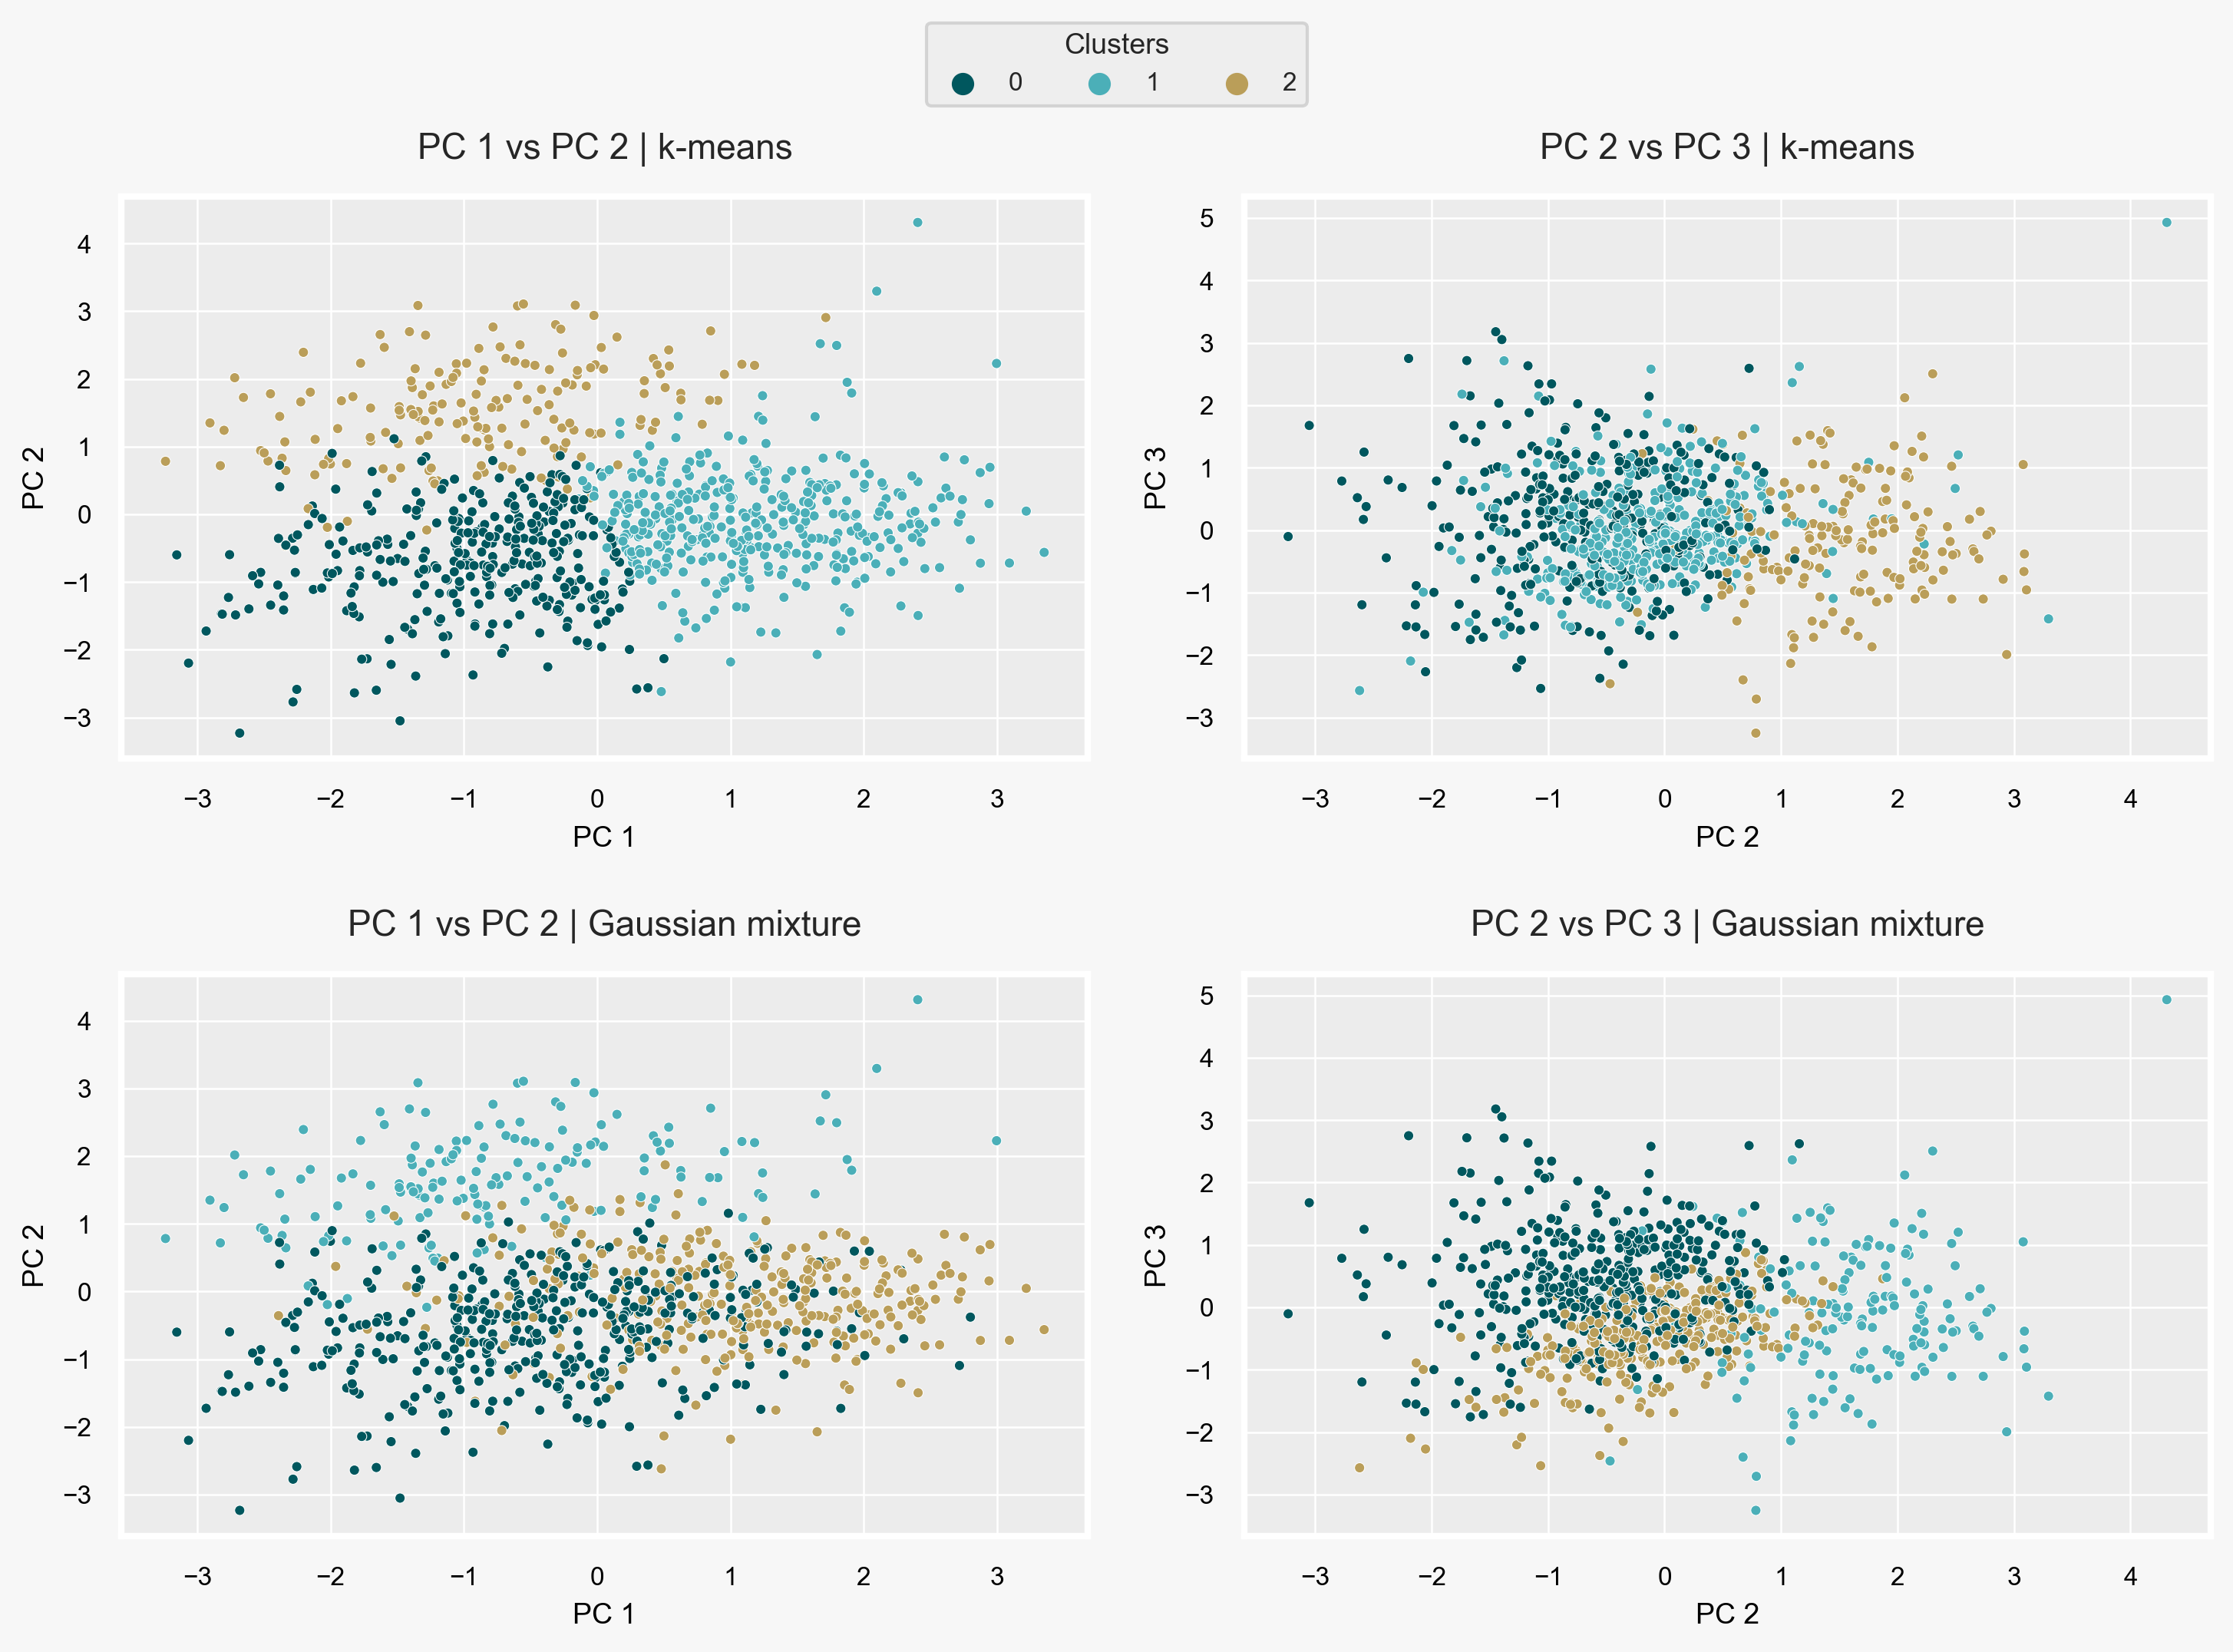

In [26]:
my_palette_2=['#00575e', '#4bafb8', '#ba9e59']

with plt.rc_context(rc={'figure.dpi': 300, 'axes.labelsize': 9, 
                        'xtick.labelsize': 8, 'ytick.labelsize': 8}):
    
    fig, ax = plt.subplots(2, 2, figsize=(10, 7))
    
    ax=ax.flatten()
    
    # PC 1 & PC 2 | PC 2 & PC 3 | k-means
    
    sns.scatterplot(ax=ax[0], x=PCA_scores['PC 1'], y=PCA_scores['PC 2'], 
                    hue=df['K_means'], palette=my_palette_2, s=10)
    
    ax[0].get_legend().remove()
    ax[0].set_title('PC 1 vs PC 2 | k-means', 
                      fontsize=11, pad=12)
    
    sns.scatterplot(ax=ax[1], x=PCA_scores['PC 2'], y=PCA_scores['PC 3'], 
                    hue=df['K_means'], palette=my_palette_2, s=10)
    
    ax[1].get_legend().remove()
    ax[1].set_title('PC 2 vs PC 3 | k-means', 
                      fontsize=11, pad=12)
    
    # PC 1 & PC 2 | PC 2 & PC 3 | Gaussian mixture
    
    sns.scatterplot(ax=ax[2], x=PCA_scores['PC 1'], y=PCA_scores['PC 2'], 
                    hue=df['Gaussian_mixture'], palette=my_palette_2, s=10)
    
    ax[2].get_legend().remove()
    ax[2].set_title('PC 1 vs PC 2 | Gaussian mixture', 
                      fontsize=11, pad=12)
    
    sns.scatterplot(ax=ax[3], x=PCA_scores['PC 2'], y=PCA_scores['PC 3'], 
                    hue=df['Gaussian_mixture'], palette=my_palette_2, s=10)
    
    ax[3].get_legend().remove()
    ax[3].set_title('PC 2 vs PC 3 | Gaussian mixture', 
                      fontsize=11, pad=12)
    
    # A global legend
    
    handles, labels=ax[1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', 
                 bbox_to_anchor=(0.5, 1.04), ncol=3, 
                 fontsize=8, title='Clusters', title_fontsize=9)
    
    plt.tight_layout(pad=1.5)
    plt.show()

<p><div style = "text-align: justify; font-size: 14px">It is worth mentioning that various clustering algorithms will name clusters differently. Thus, we have to pay attention to how clusters are shaped rather than coloured or named.
With respect to this data set, it is apparent that both algorithms produced largely comparable clusters. Note, since the k-means algorithm tends to produce spherical shaped clusters, 3 perfectly distinct clusters on the 1st biplot might be a sign of overfitting.</div>